# **Simulation of Mouse Brain Network**

In [1]:
%reload_ext autoreload
%autoreload 2

from MBN_Res_Constrn import MBN_RC
import matplotlib.pyplot as plt
import numpy as np

# **Simulation**

In [2]:
mbn = MBN_RC(nepochs=40000,
             dt=0.05,
             lambda_o=2.95,
             alpha=0.01,
             beta=0.002,
             plot_bifurcation=False)
mbn.run_model()

/content/mb_communities.npz already exists
DataUtils initialized
Average shortest path length:  2.1057608395470866
Avg clustering coefficient:  0.37852781810835767
LAMBDA_O=2.95, Global Order(R)=0.04300032586175399
LAMBDA_O=2.95, Global Order(R)=0.06315715008186823
LAMBDA_O=2.95, Global Order(R)=0.07869292640042495
LAMBDA_O=2.95, Global Order(R)=0.16783496151297184
LAMBDA_O=2.95, Global Order(R)=0.0842602577652503
LAMBDA_O=2.95, Global Order(R)=0.3444430274520309
LAMBDA_O=2.95, Global Order(R)=0.5298917081471767
LAMBDA_O=2.95, Global Order(R)=0.44581865867708786
LAMBDA_O=2.95, Global Order(R)=0.479378343161698
LAMBDA_O=2.95, Global Order(R)=0.5022939903331202
LAMBDA_O=2.95, Global Order(R)=0.5059074435333538
LAMBDA_O=2.95, Global Order(R)=0.49691309097445213
LAMBDA_O=2.95, Global Order(R)=0.4752603659564535
LAMBDA_O=2.95, Global Order(R)=0.4277442713068788
LAMBDA_O=2.95, Global Order(R)=0.49557592170050907
LAMBDA_O=2.95, Global Order(R)=0.5266931377131128
LAMBDA_O=2.95, Global Order(R)

# **Plot: Time vs Global Synchrony**


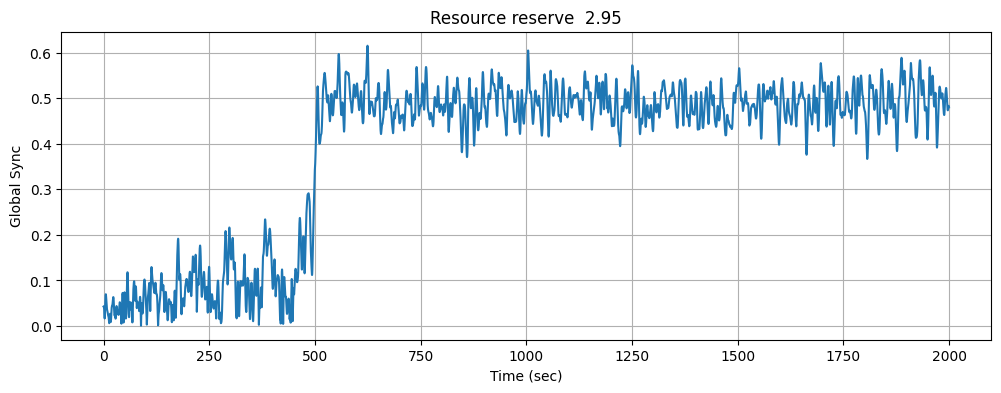

In [17]:
f = plt.figure(figsize=(12, 4))
plt.title("Resource reserve  " + str(mbn.LAMBDA_O))
plt.plot(np.linspace(0, mbn.NEPOCHS-1, mbn.NEPOCHS)*mbn.DT, mbn.GLOBAL_ORDER_VERBOSE)
plt.ylabel("Global Sync")
plt.xlabel("Time (sec)")
plt.grid()
plt.show()

# **Print number of transitions in a simulation**

In [18]:
mbn.transition_count()

Total transitions: 283


# **Print duration of each transitions observed**

In [19]:
mbn.transition_time()
time=mbn.tTime

Transition Time for Transition 1: 53.00 sec
Transition Time for Transition 2: 41.00 sec
Transition Time for Transition 3: 117.00 sec
Transition Time for Transition 4: 17.00 sec
Transition Time for Transition 5: 47.00 sec
Transition Time for Transition 6: 21.00 sec
Transition Time for Transition 7: 61.00 sec
Transition Time for Transition 8: 56.00 sec
Transition Time for Transition 9: 45.00 sec
Transition Time for Transition 10: 78.00 sec
Transition Time for Transition 11: 50.00 sec
Transition Time for Transition 12: 33.00 sec
Transition Time for Transition 13: 81.00 sec
Transition Time for Transition 14: 36.00 sec
Transition Time for Transition 15: 30.00 sec
Transition Time for Transition 16: 20.00 sec
Transition Time for Transition 17: 42.00 sec
Transition Time for Transition 18: 38.00 sec
Transition Time for Transition 19: 84.00 sec
Transition Time for Transition 20: 111.00 sec
Transition Time for Transition 21: 60.00 sec
Transition Time for Transition 22: 46.00 sec
Transition Time f

##**Plot: Box plot for transition time observed in a single experiment**

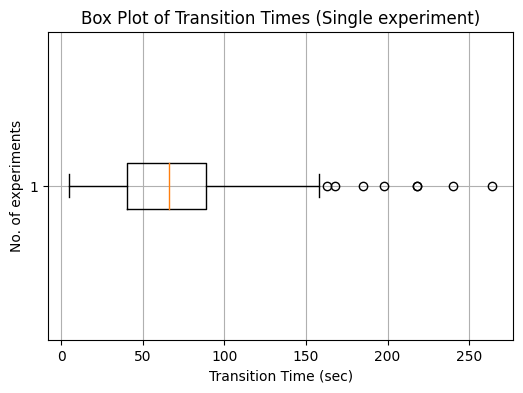

In [8]:
plt.figure(figsize=(6, 4))
plt.boxplot(time, vert=False)
plt.xlabel('Transition Time (sec)')
plt.ylabel('No. of experiments')
plt.title('Box Plot of Transition Times (Single experiment)')
plt.grid(True)
plt.show()

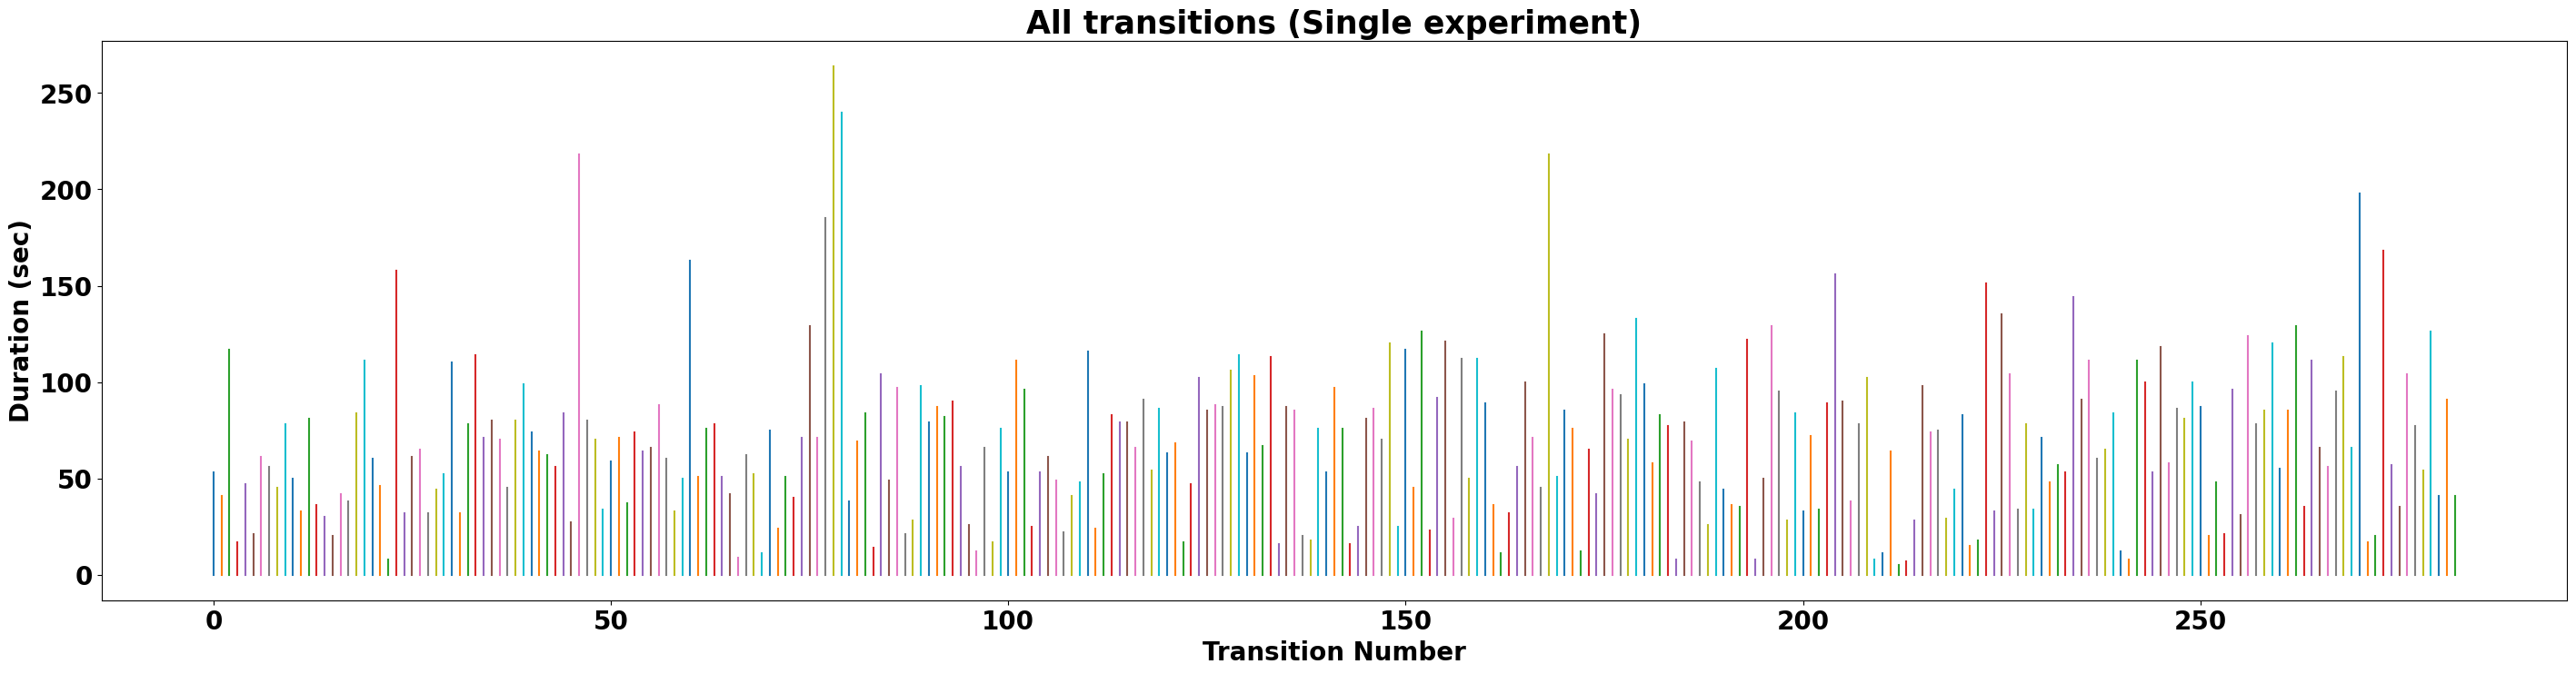

In [14]:
plt.figure(figsize=(35, 8))
for i, duration in enumerate(time):
    plt.plot([i, i], [0, duration])
ax=plt.gca()
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(20)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(20)
plt.xlabel('Transition Number', fontsize=20, fontweight='bold')
plt.ylabel('Duration (sec)', fontsize=20, fontweight='bold')
plt.title('All transitions (Single experiment)', fontsize=25, fontweight='bold')
plt.show()

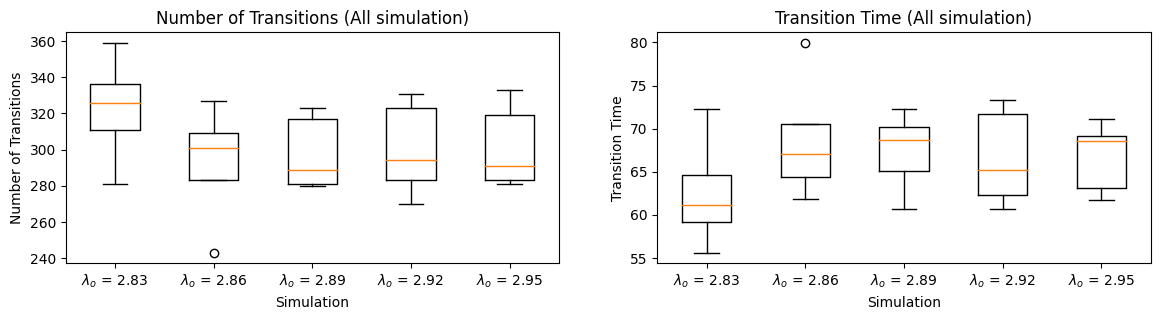

In [16]:
#Each simulation ran five times with the same initial conditions, and different observations were found each time.
#Transition count from simulations with different initial conditions.
transitions = [
    [311,359,336,281,326], #simulation1
    [243,283,301,309,327], #simulation2
    [317,323,281,280,289], #simulation3
    [270,331,323,294,283], #simulation4
    [283,281,319,333,291], #simulation5
]
#Corresponding transition times from simulations with different initial conditions.
transition_time = [
    [64.66, 55.60,59.17,72.32, 61.18], #simulation1
    [79.95,70.53,67.06,64.39,61.85],   #simulation2
    [65.05,60.69,68.63,72.24,70.19],   #simulation3
    [73.33,60.73,62.34,65.24,71.73],   #simulation4
    [69.15,71.17,63.12,61.70,68.52],   #simulation5
]
param=['$\lambda_o$ = 2.83','$\lambda_o$ = 2.86','$\lambda_o$ = 2.89','$\lambda_o$ = 2.92','$\lambda_o$ = 2.95']
plt.figure(figsize=(14, 3))
plt.subplot(1, 2, 1)
plt.boxplot(transitions,labels=param)
plt.xlabel('Simulation')
plt.ylabel('Number of Transitions')
plt.title('Number of Transitions (All simulation)')

plt.subplot(1, 2, 2)
plt.boxplot(transition_time,labels=param)
plt.xlabel('Simulation')
plt.ylabel('Transition Time')
plt.title('Transition Time (All simulation)')
plt.show()